# Population, Agricultural Production, and the Green Revolution
### *This file contains all data cleaning and visualisations for agriculutral production in South Asia*

**South Asian countries:** Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka

In [1]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl.metadata (28 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


Key '-8551624839639902780' not in persistent cache.
Key '-1342264069138248685' not in persistent cache.
Key '8300603334170868901' not in persistent cache.
Key '4798972857496365594' not in persistent cache.
Key '5416133053844435203' not in persistent cache.
Key '-4563025058676194049' not in persistent cache.
Key '3951291392009506186' not in persistent cache.
Key '-8089984832763166605' not in persistent cache.
Key '2914012134343638985' not in persistent cache.
Key '-5247375042296256187' not in persistent cache.
Key '6184620909564606516' not in persistent cache.
Key '-7020138423947866392' not in persistent cache.
Key '4660318267239913049' not in persistent cache.
Key '-3501068909399982123' not in persistent cache.
Key '1190294193515034193' not in persistent cache.
Key '2611850866069099732' not in persistent cache.
Key '-6735022963556306491' not in persistent cache.
Key '-915108908017872824' not in persistent cache.
Key '2349723193980685482' not in persistent cache.
Key '-88876601092272120

In [2]:
# Set World Bank Data Sources/Indicators for Agriculutre
 
ag_indicators = wbdata.get_indicators(topic=1)
ag_indicators

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO        Agricultural machinery, tractors
AG.CON.FERT.PT.ZS     Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS        Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.HA        Arable land (hectares)
AG.LND.ARBL.HA.PC     Arable land (hectares per person)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.CREL.HA        Land under cereal production (hectares)
AG.LND.CROP.ZS        Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)

## Agricultural Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [24]:
variable_labels = {"AG.PRD.CREL.MT":"Cereal Production (MT)",
                   "AG.PRD.CROP.XD":"Crop Production Index",
                  "AG.PRD.FOOD.XD":"Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population',
                   "SP.POP.TOTL":"Total Population"
                  # "EA.PRD.AGRI.KD":"Agricultural Value Added per Worker"
                  }
countries = {"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }
SA_ag = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True)
SA_ag = SA_ag.reset_index()
SA_ag = SA_ag.rename(columns={'date': 'Date', 'country':'Country'})
SA_ag = SA_ag.set_index(['Date']).sort_index()
SA_ag = SA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index", 
                            "Total Rural Population", 'Total Population'])
SA_ag

,Country,Cereal Production (MT),Crop Production Index,Food Production Index,Total Rural Population,Total Population
Date,,,,,,
1961-01-01,South Asia (IDA & IBRD),1.165423e+08,100.00,100.00,479825865.0,576552257.0
1961-01-01,Sri Lanka,9.518680e+05,22.90,22.43,8256868.0,9899372.0
1961-01-01,Bangladesh,1.452370e+07,27.03,24.29,50496628.0,53310348.0
1961-01-01,India,8.737650e+07,24.73,22.43,366040177.0,446564729.0
1961-01-01,Pakistan,6.729680e+06,17.81,13.71,36363520.0,46921277.0
...,...,...,...,...,...,...
2022-01-01,Bhutan,7.136470e+04,68.09,77.75,439764.0,780914.0
2022-01-01,Maldives,2.044000e+02,93.70,94.49,306413.0,524106.0
2022-01-01,Nepal,1.112837e+07,116.66,123.18,23341178.0,29715436.0


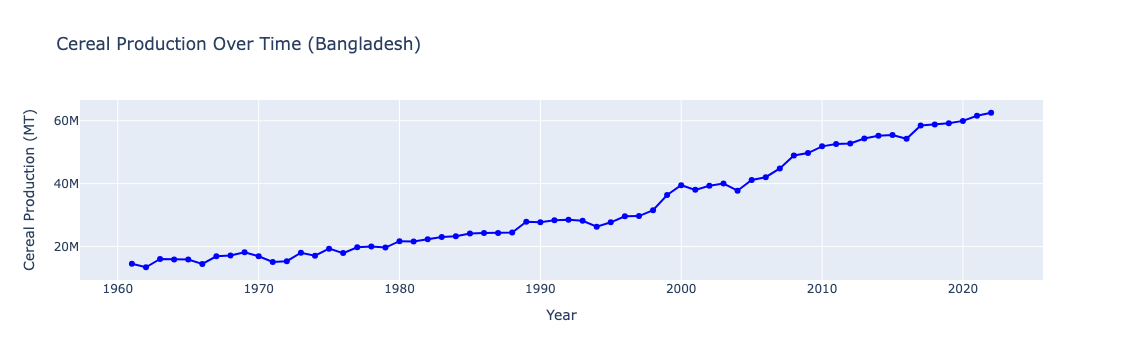

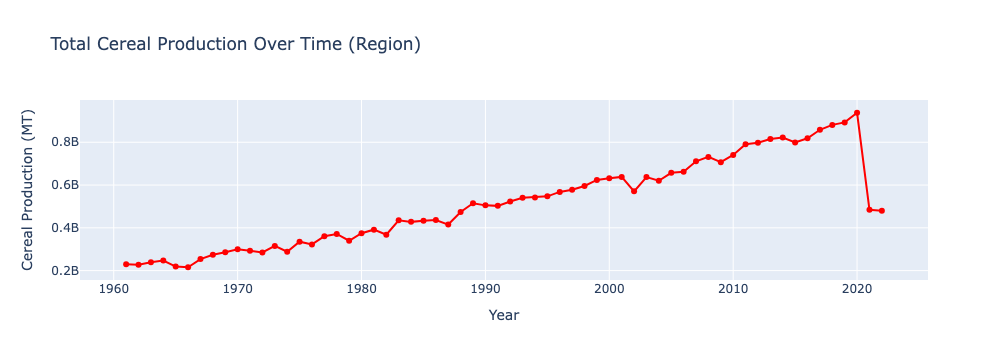

In [25]:
import plotly.graph_objects as go

def overlay_cereal_production(country_name, df):
    """
    Function to overlay cereal production over time for a given country.
    
    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the cereal production data.
    
    Returns:
    - A Plotly figure with the cereal production data for the country.
    """
    df = df.reset_index()
    # Check if the country exists in the DataFrame
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Filter data for the given country
    country_df = df[df['Country'] == country_name]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the cereal production plot for the country
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Cereal Production (MT)'], 
                             mode='lines+markers', name=country_name, 
                             line=dict(dash='solid', color='blue')))
    
    # Add title and labels
    fig.update_layout(title=f"Cereal Production Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Cereal Production (MT)")
    
    # Show the plot
    fig.show()

def overlay_cereal_production_region(df):
    """
    Function to overlay total cereal production over time for the whole region.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the cereal production data.
    
    Returns:
    - A Plotly figure with total cereal production for the region.
    """
    df = df.reset_index()
    # Group data by year and sum the production
    region_df = df.groupby('Date')['Cereal Production (MT)'].sum().reset_index()
    
    # Create a figure
    fig = go.Figure()
    
    # Add the total cereal production plot for the region
    fig.add_trace(go.Scatter(x=region_df['Date'], y=region_df['Cereal Production (MT)'], 
                             mode='lines+markers', name="Total Region", 
                             line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Cereal Production Over Time (Region)",
                      xaxis_title="Year",
                      yaxis_title="Cereal Production (MT)")
    
    # Show the plot
    fig.show()

# Example usage:
overlay_cereal_production("Bangladesh", SA_ag)
overlay_cereal_production_region(SA_ag)

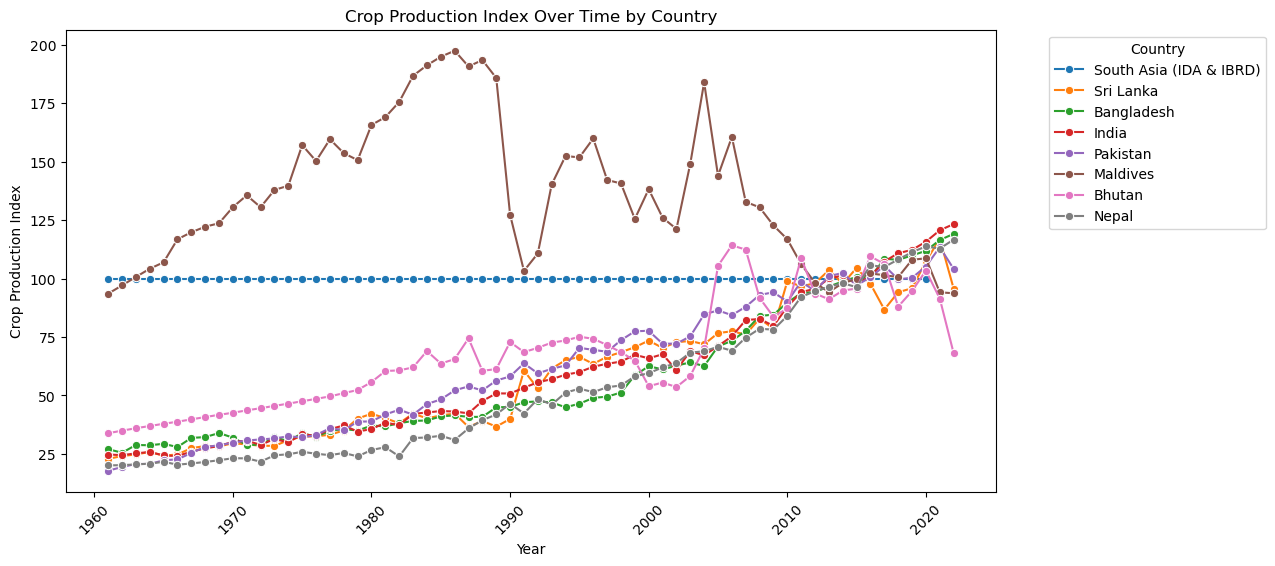

In [26]:
# Produce Crop Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

SA_ag = SA_ag.reset_index() 
SA_ag = SA_ag.rename(columns={'date': 'Date'})  # Ensure correct column name

plt.figure(figsize=(12, 6))

# Line plot for Crop Production Index over time
sns.lineplot(data=SA_ag, x="Date", y="Crop Production Index", hue="Country", marker="o")

plt.xlabel("Year")
plt.ylabel("Crop Production Index")
plt.title("Crop Production Index Over Time by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

# green_rev_crops = ["Wheat", "Rice", "Maize", "Sorghum", "Barley"]

# plt.figure(figsize=(12, 6))

# # Filter dataset for only Green Revolution crops
# for crop in green_rev_crops:
#     if crop in SA_ag.columns:
#         sns.lineplot(data=SA_ag, x="Date", y=crop, label=crop)

# plt.xlabel("Year")
# plt.ylabel("Production Index")
# plt.title("Top Green Revolution Crops Over Time")
# plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.xticks(rotation=45)
# plt.show()

In [27]:
# Produce Food Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

# Unable to do so because data not granual to crop type just production index

In [ ]:
# Produce plot of Agricultural Value Added per Worker for each country

# Indicator no longer available in dataset?

# Combined Analysis

**Question:** Given that we cannot load the agricultural data and the population data set at the same time, how can we approach making combined graphs?

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

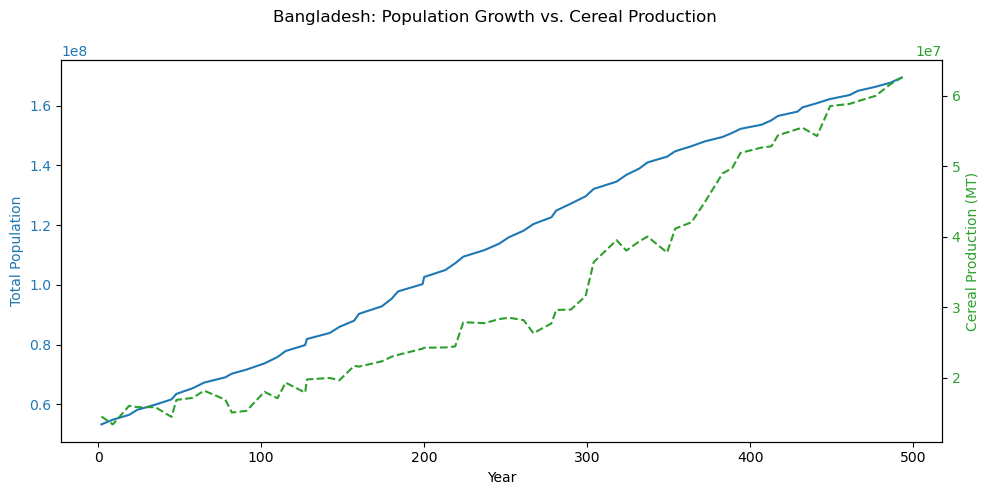

In [30]:
# Overlay total population and cereal production plots to see impact of cereal production on population growth

import matplotlib.pyplot as plt

def plot_popvcereal(df, country):
    """
    Plots an overlayed line plot of total population growth and cereal production over time for a given country.
    
    :param df: DataFrame containing agricultural and population data
    :param country: String representing the country to plot
    """
    country_data = df[df['Country'] == country]
    
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # Plot total population
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Total Population", color='tab:blue')
    ax1.plot(country_data.index, country_data["Total Population"], color='tab:blue', label='Total Population')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a second y-axis for cereal production
    ax2 = ax1.twinx()
    ax2.set_ylabel("Cereal Production (MT)", color='tab:green')
    ax2.plot(country_data.index, country_data["Cereal Production (MT)"], color='tab:green', linestyle='dashed', label='Cereal Production')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    
    fig.suptitle(f"{country}: Population Growth vs. Cereal Production")
    fig.tight_layout()
    plt.show()

plot_popvcereal(SA_ag, "Bangladesh")

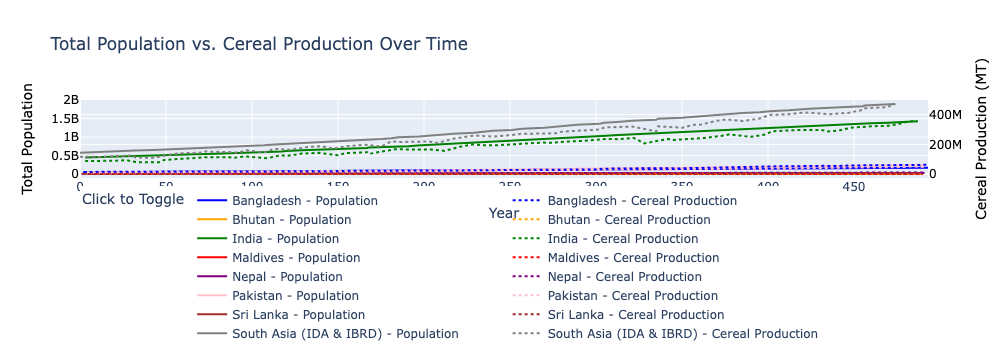

In [32]:
countries = ["Bangladesh",
             "Bhutan",
             "India",
             "Maldives",
             "Nepal",
             "Pakistan",
             "Sri Lanka",
             "South Asia (IDA & IBRD)"
            ]

import plotly.graph_objects as go
import plotly.io as pio

def plot_popvcereal_interactive(df, countries):
    """
    Creates an interactive overlayed line plot of total population growth and cereal production 
    over time for multiple countries, assigning a unique color per country.
    
    :param df: DataFrame containing agricultural and population data
    :param countries: List of strings representing the countries to plot
    """
    fig = go.Figure()
    
    # Define a color palette for different countries
    color_palette = [
        'blue', 'orange', 'green', 'red', 'purple', 'pink', 'brown', 'gray'
    ]
    
    country_colors = {country: color_palette[i % len(color_palette)] for i, country in enumerate(countries)}

    # Loop through each country and add two traces (Population & Cereal Production)
    for country in countries:
        country_data = df[df['Country'] == country]
        color = country_colors[country]  # Assign unique color

        # Total Population Line (Primary Y-Axis, Solid)
        fig.add_trace(go.Scatter(
            x=country_data.index, 
            y=country_data["Total Population"],
            mode='lines',
            name=f"{country} - Population",
            line=dict(color=color, width=2),
            yaxis='y1',  # Assigns to primary y-axis
        ))

        # Cereal Production Line (Secondary Y-Axis, Dashed)
        fig.add_trace(go.Scatter(
            x=country_data.index, 
            y=country_data["Cereal Production (MT)"],
            mode='lines',
            name=f"{country} - Cereal Production",
            line=dict(color=color, dash='dot', width=2),
            yaxis='y2',  # Assigns to secondary y-axis
        ))

    # Layout adjustments for interactivity and readability
    fig.update_layout(
        title="Total Population vs. Cereal Production Over Time",
        xaxis=dict(title="Year"),
        yaxis=dict(title="Total Population", color='black'),
        yaxis2=dict(
            title="Cereal Production (MT)",
            overlaying='y',  # Overlay second y-axis on the same plot
            side='right',
            color='black'
        ),
        legend=dict(title="Click to Toggle", orientation="h"),  # Interactive legend
    )

    # Show interactive plot
    fig.show()

# Example usage:
plot_popvcereal_interactive(SA_ag, countries)

In [ ]:
# Overlay total crop production index over time with agriculutral value of worker added

In [ ]:
# Add asymptotes for major technological advancements in the timeline (i.e. new fertiliser, etc.)